In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [17]:
data_train = pd.read_csv("data/Google_Stock_Price_Train.csv")
training_set = pd.DataFrame(data_train["Open"])
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(training_set)
training_set_scaled = scaler.transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
X_train = []
y_train = []

for i in range(60,len(training_set)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train),np.array(y_train)

In [7]:
X_train.shape

(1198, 60)

In [8]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))

In [14]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units = 50,
                               return_sequences = True,
                               input_shape = (X_train.shape[1],1)))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.LSTM(units = 50,
                               return_sequences = True))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.LSTM(units = 50,
                               return_sequences = True))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.LSTM(units = 50))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x=X_train,y=y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 [==============================] - 8s 63ms/step - loss: 0.1087
Epoch 2/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0088
Epoch 3/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0065
Epoch 5/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

In [43]:
data_test = pd.read_csv("data/Google_Stock_Price_Test.csv")
real_price = pd.DataFrame(data_test["Open"])

In [34]:
dataset_total = pd.concat([data_train['Open'],data_test['Open']],axis=0,ignore_index=True)
inputs = dataset_total.iloc[len(dataset_total)-len(data_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [39]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

In [40]:
predicted_price

array([[783.9527 ],
       [781.0141 ],
       [781.6557 ],
       [783.54315],
       [787.23395],
       [793.3082 ],
       [798.36786],
       [799.63684],
       [799.1273 ],
       [798.60986],
       [798.6473 ],
       [798.8852 ],
       [799.1318 ],
       [799.9737 ],
       [801.076  ],
       [806.0958 ],
       [813.34985],
       [820.5991 ],
       [823.6083 ],
       [817.68146]], dtype=float32)

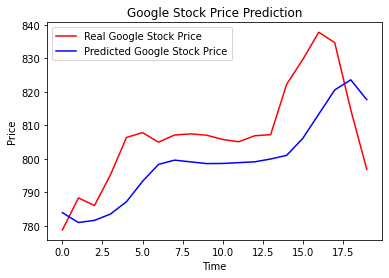

In [49]:
plt.plot(real_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_price,color="blue",label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(real_price, predicted_price,squared=False)
rmse

13.372812102062603